Q1


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Part 1


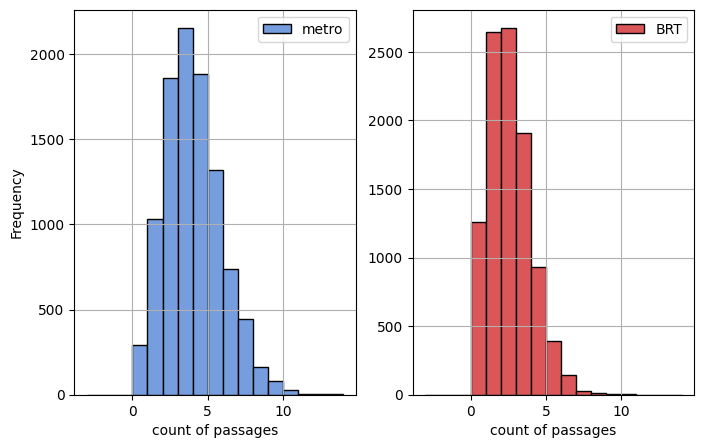

In [148]:
tarbiat_df = pd.read_csv('Tarbiat.csv')
figure, axis = plt.subplots(1, 2) 
axis[0].hist(tarbiat_df['metro'],np.arange(-3,15,1), color = '#769ede',edgecolor = 'black',label="metro" )
axis[1].hist(tarbiat_df['BRT'],np.arange(-3,15,1), color = '#db5658',edgecolor = 'black',label="BRT" )
axis[0].legend()
axis[0].grid(True)
axis[0].set_ylabel('Frequency')
axis[0].set_xlabel('count of passages')
axis[1].set_xlabel('count of passages')
axis[1].legend()
axis[1].grid(True)
figure.set_size_inches(8,5)

plt.show()

Part 2


In [142]:
metro_mean = tarbiat_df['metro'].mean()
metro_var = pow(tarbiat_df['metro'].std(),2)
metro_approximate_lambda =(metro_mean+metro_var)/2
print(f"metro passages is a poisson distribution with mean = {metro_mean}")
print(f"metro passages is a poisson distribution with var = {metro_var}")
print(f"So metro passages is a poisson distribution with lambda ~= {metro_approximate_lambda}")
print()
BRT_mean = tarbiat_df['BRT'].mean()
BRT_var = pow(tarbiat_df['BRT'].std(),2)
BRT_approximate_lambda =(BRT_mean+BRT_var)/2
print(f"BRT passages is a poisson distribution with mean = {BRT_mean}")
print(f"BRT passages is a poisson distribution with var = {BRT_var}")
print(f"So BRT passages is a poisson distribution with lambda ~= {BRT_approximate_lambda}")

plt.show()

metro passages is a poisson distribution with mean = 3.5316
metro passages is a poisson distribution with var = 3.603561796179618
So metro passages is a poisson distribution with lambda ~= 3.567580898089809

BRT passages is a poisson distribution with mean = 2.0636
BRT passages is a poisson distribution with var = 2.067161756175618
So BRT passages is a poisson distribution with lambda ~= 2.065380878087809


Part 3


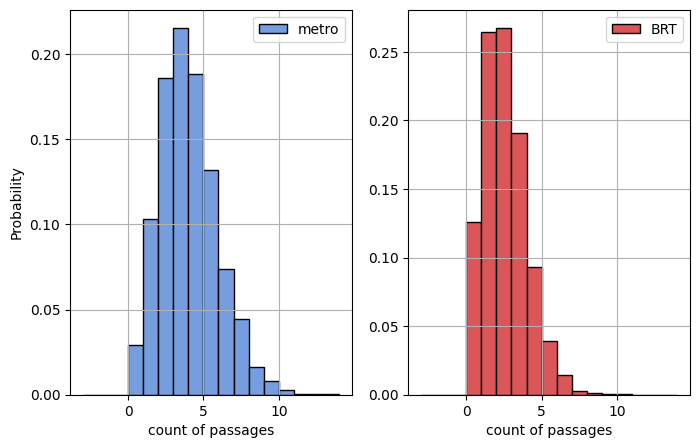

In [143]:
figure, axis = plt.subplots(1, 2) 
axis[0].hist(tarbiat_df['metro'],np.arange(-3,15,1), color = '#769ede',edgecolor = 'black',label="metro" ,density=True)
axis[1].hist(tarbiat_df['BRT'],np.arange(-3,15,1), color = '#db5658',edgecolor = 'black',label="BRT" ,density=True)
axis[0].legend()
axis[0].grid(True)
axis[0].set_ylabel('Probability')
axis[0].set_xlabel('count of passages')
axis[1].set_xlabel('count of passages')
axis[1].legend()
axis[1].grid(True)
figure.set_size_inches(8,5)



Part 4


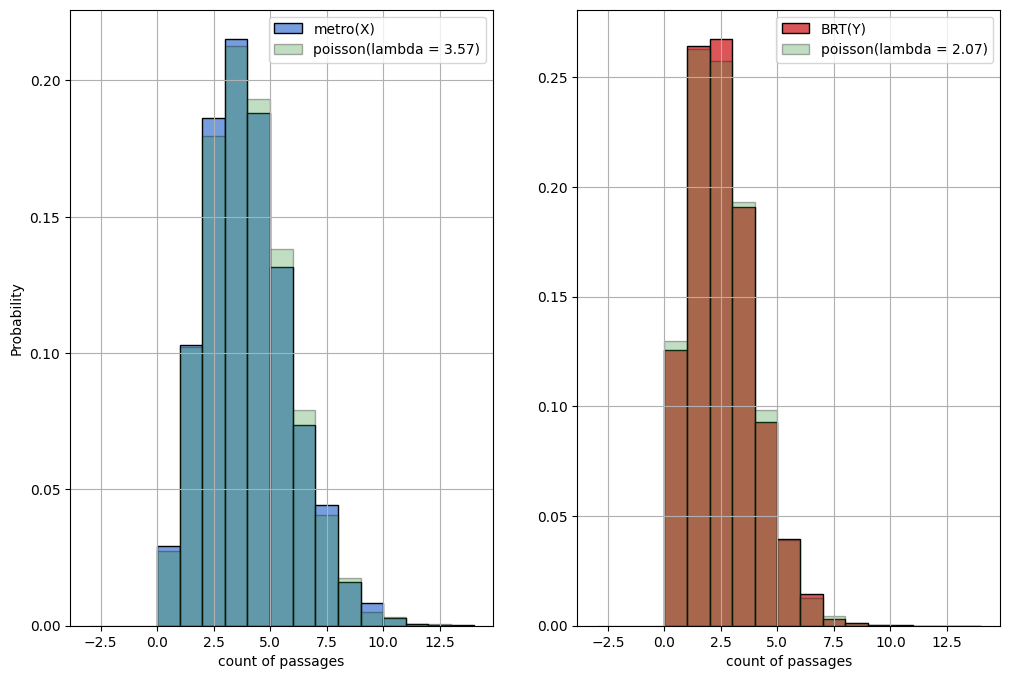

In [151]:
figure, axis = plt.subplots(1, 2) 

# prev histograms
axis[0].hist(tarbiat_df['metro'],np.arange(0,15,1), color = '#769ede',edgecolor = 'black',label="metro(X)" ,density=True)
axis[1].hist(tarbiat_df['BRT'],np.arange(0,15,1), color = '#db5658',edgecolor = 'black',label="BRT(Y)" ,density=True)

# exact histograms of poisson distribution
metro_lambda = metro_approximate_lambda
BRT_lambda = BRT_approximate_lambda
data = stats.poisson.rvs(metro_lambda, size=10000)
axis[0].hist(data, np.arange(-3,15,1), color='#328f35', edgecolor='black',label="poisson(lambda = 3.57)", alpha=0.3,density=True)
data = stats.poisson.rvs(BRT_lambda, size=10000)
axis[1].hist(data, np.arange(-3,15,1), color='#328f35', edgecolor='black',label="poisson(lambda = 2.07)", alpha=0.3,density=True)
axis[0].legend()
axis[1].legend()


axis[0].set_ylabel('Probability')
axis[0].set_xlabel('count of passages')
axis[1].set_xlabel('count of passages')
axis[0].grid(True)
axis[1].grid(True)
figure.set_size_inches(12,8)
plt.show()


Part 5


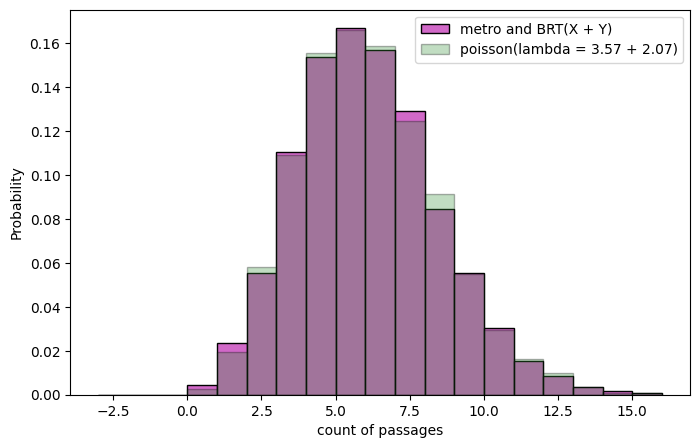

In [145]:
figure, axis = plt.subplots(1, 1) 

# prev histograms
axis.hist(tarbiat_df['metro']+ tarbiat_df['BRT'],np.arange(-3,17,1), color = '#d169c8',edgecolor = 'black',label="metro and BRT(X + Y)" ,density=True)

# exact histograms of poisson distribution
data = stats.poisson.rvs(BRT_lambda + metro_lambda, size=10000)
axis.hist(data, np.arange(-3,17,1), color='#328f35', edgecolor='black',label="poisson(lambda = 3.57 + 2.07)", alpha=0.3,density=True)
axis.legend()

axis.set_ylabel('Probability')
axis.set_xlabel('count of passages')
# axis.grid(True)
figure.set_size_inches(8,5)
plt.show()

Part 6


Hand calculates are in report.

Part 7


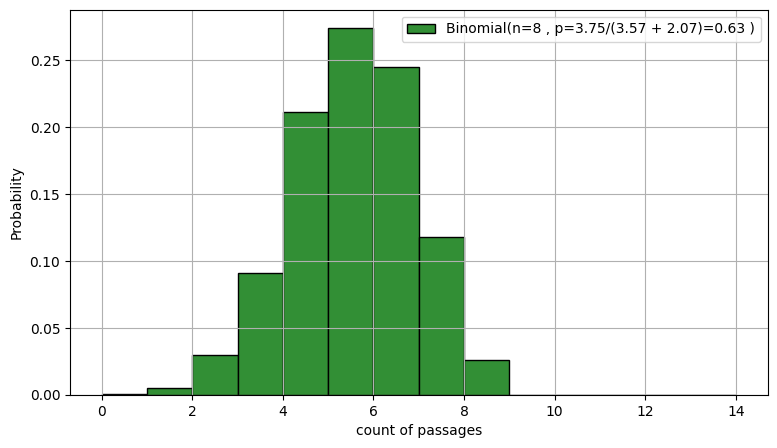

In [146]:
figure, axis = plt.subplots(1, 1) 
n = 8
# exact histogram of binomial distribution
data = stats.binom.rvs(n, metro_lambda/(BRT_lambda + metro_lambda), size=5000)
axis.hist(data, np.arange(0,15,1), color='#328f35', edgecolor='black',label="Binomial(n=8 , p=3.75/(3.57 + 2.07)=0.63 )",density=True)
axis.legend()

axis.set_ylabel('Probability')
axis.set_xlabel('count of passages')
axis.grid(True)
figure.set_size_inches(9,5)
plt.show()

Part 8


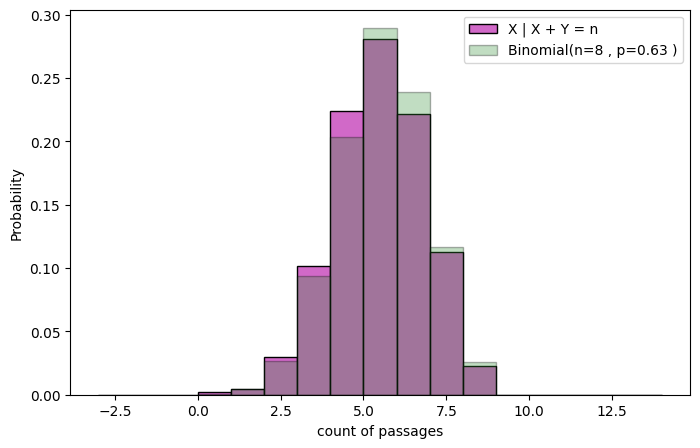

In [147]:
figure, axis = plt.subplots(1, 1) 
# practical histogram

axis.hist(tarbiat_df['metro'][tarbiat_df['metro'] + tarbiat_df['BRT'] == n] ,np.arange(-3,15,1), color = '#d169c8',edgecolor = 'black',label="X | X + Y = n" ,density=True)

# exact histogram of binomial distribution
data = stats.binom.rvs(n, metro_lambda/(BRT_lambda + metro_lambda), size=10000)
axis.hist(data, np.arange(0,15,1), color='#328f35', edgecolor='black',label="Binomial(n=8 , p=0.63 )", alpha=0.3,density=True)
axis.legend()

axis.set_ylabel('Probability')
axis.set_xlabel('count of passages')
figure.set_size_inches(8,5)
plt.show()